<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Pipeline de Dados do Telegram II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Ingestão;</li>
  <li>ETL;</li>
  <li>Apresentação;</li>
  <li>Storytelling.</li>
</ol>

---

# **Exercícios**

## 0\. Contexto

In [1]:
from getpass import getpass

token = getpass()

··········


In [2]:
import json

base_url = f'https://api.telegram.org/bot{token}'

In [3]:
import requests

response = requests.get(url=f'{base_url}/getMe')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": {
    "id": 7082230375,
    "is_bot": true,
    "first_name": "Monitor_bot2",
    "username": "Monitor9002_bot",
    "can_join_groups": false,
    "can_read_all_group_messages": false,
    "supports_inline_queries": false,
    "can_connect_to_business": false
  }
}


In [4]:
response = requests.get(url=f'{base_url}/getUpdates')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": [
    {
      "update_id": 839949856,
      "message": {
        "message_id": 3,
        "from": {
          "id": 5246816719,
          "is_bot": false,
          "first_name": "Nie",
          "username": "NieZzzv",
          "language_code": "pt-br"
        },
        "chat": {
          "id": -1002233351657,
          "title": "Chat_monitor2_bot",
          "type": "supergroup"
        },
        "date": 1720270581,
        "text": "Ol\u00e1 mundo!"
      }
    },
    {
      "update_id": 839949857,
      "message": {
        "message_id": 4,
        "from": {
          "id": 5246816719,
          "is_bot": false,
          "first_name": "Nie",
          "username": "NieZzzv",
          "language_code": "pt-br"
        },
        "chat": {
          "id": -1002233351657,
          "title": "Chat_monitor2_bot",
          "type": "supergroup"
        },
        "date": 1720270645,
        "text": "Tudo bem com voc\u00ea?"
      }
    }
  ]
}


## 1\. Ingestão

Replique as atividades da aula 1.

1.1. Crie um `bucket` no `AWS S3` para o armazenamento de dados crus, não se esqueça de adicionar o sufixo `-raw`.

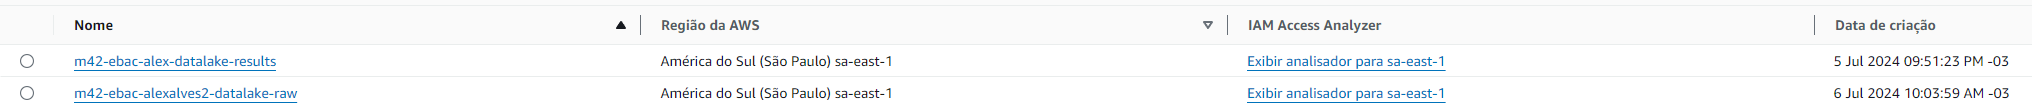

1.2. Crie uma função no `AWS Lambda` para recebimento das mensagens e armazenamento no formato JSON no `bucket` de dados crus. Não se esqueça de configurar as variáveis de ambiente e de adicionar as permissão de interação com `AWS S3` no `AWS IAM`.

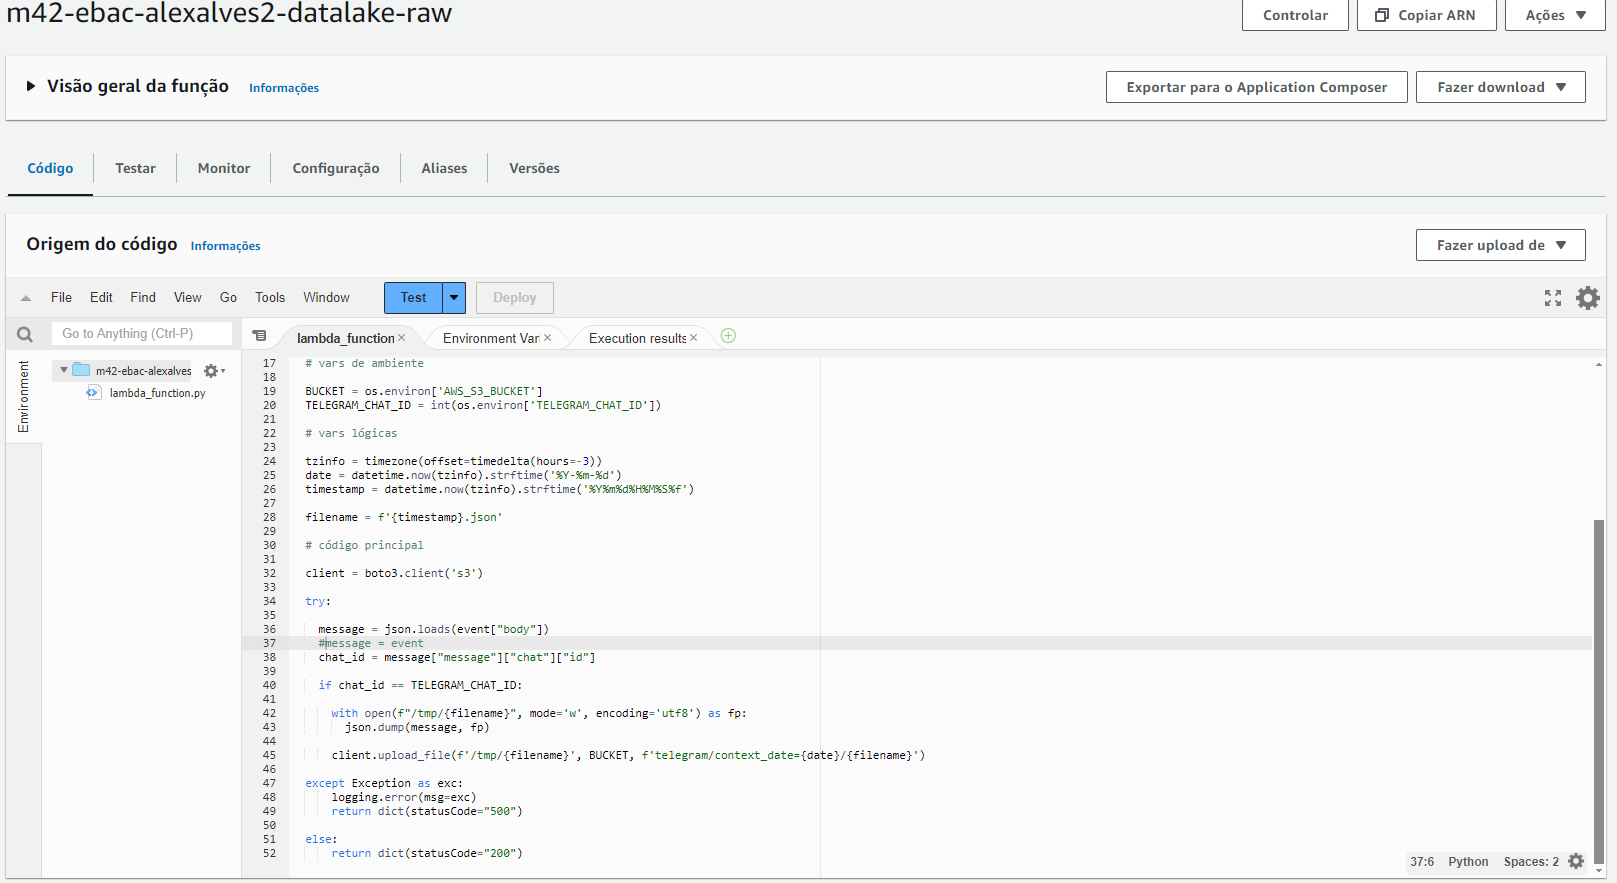

> **Nota**: Para testar a função com evento do próprio `AWS Lambda`, substitua o código `message = json.loads(event["body"])` por `message = event`. Lembre-se que o primeiro só faz sentido na integração com o `AWS API Gateway`.

1.3. Crie uma API no `AWS API Gateway` a conecte a função do `AWS Lambda`, conforme apresentado na aula.

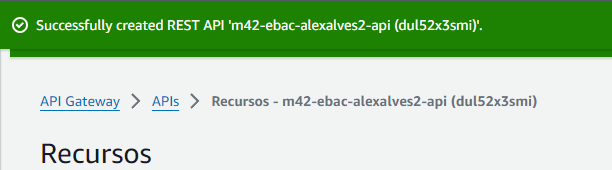

In [5]:
aws_api_gateway_url = getpass()

··········


> **Nota**: não disponibilize o endereço da API gerada.

1.4. Configura o *webhook* do *bot* através do método `setWebhook` da API de *bots* do **Telegram**. utilize o endereço da API criada no `AWS API Gateway`. Utilize o método `getWebhookInfo` para consultar a integração.

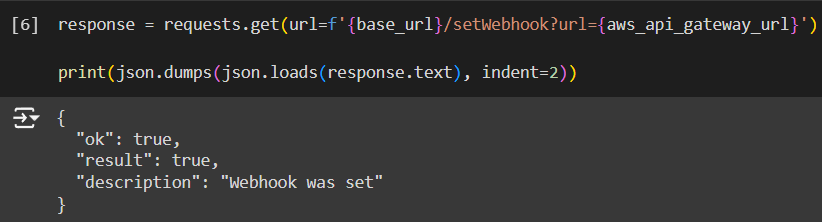

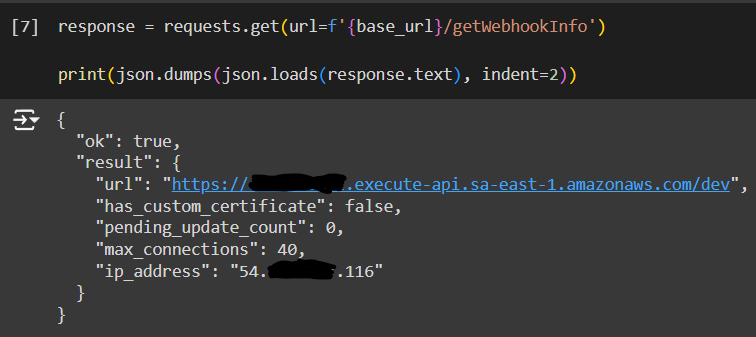

> **Nota**: não disponibilize o *token* de acesso ao seu *bot* da API de *bots* do **Telegram**.

## 2\. ETL

Replique as atividades da aula 2.

2.1. Crie um `bucket` no `AWS S3` para o armazenamento de dados enriquecidos, não se esqueça de adicionar o sufixo `-enriched`.

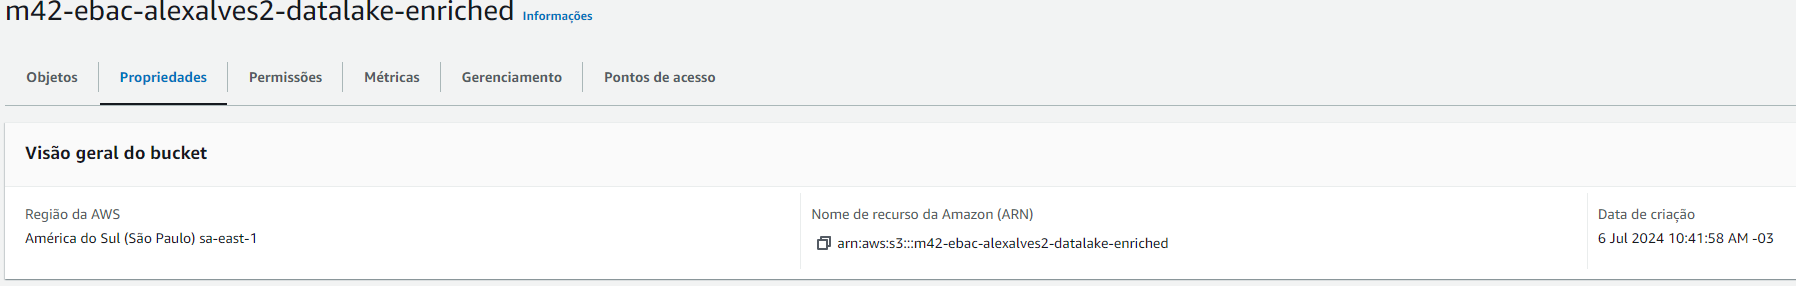

2.2. Cria uma função no `AWS Lambda` para processar as mensagens JSON de uma única partição do dia anterior (D-1), armazenadas no *bucket* de dados crus. Salve o resultado em um único arquivo PARQUET, também particionado por dia. Não se esqueça de configurar as variáveis de ambiente, de adicionar as permissão de interação com `AWS S3` no `AWS IAM`, de configurar o *timeout* e de adicionar a *layer* com o código do pacote Python PyArrow.

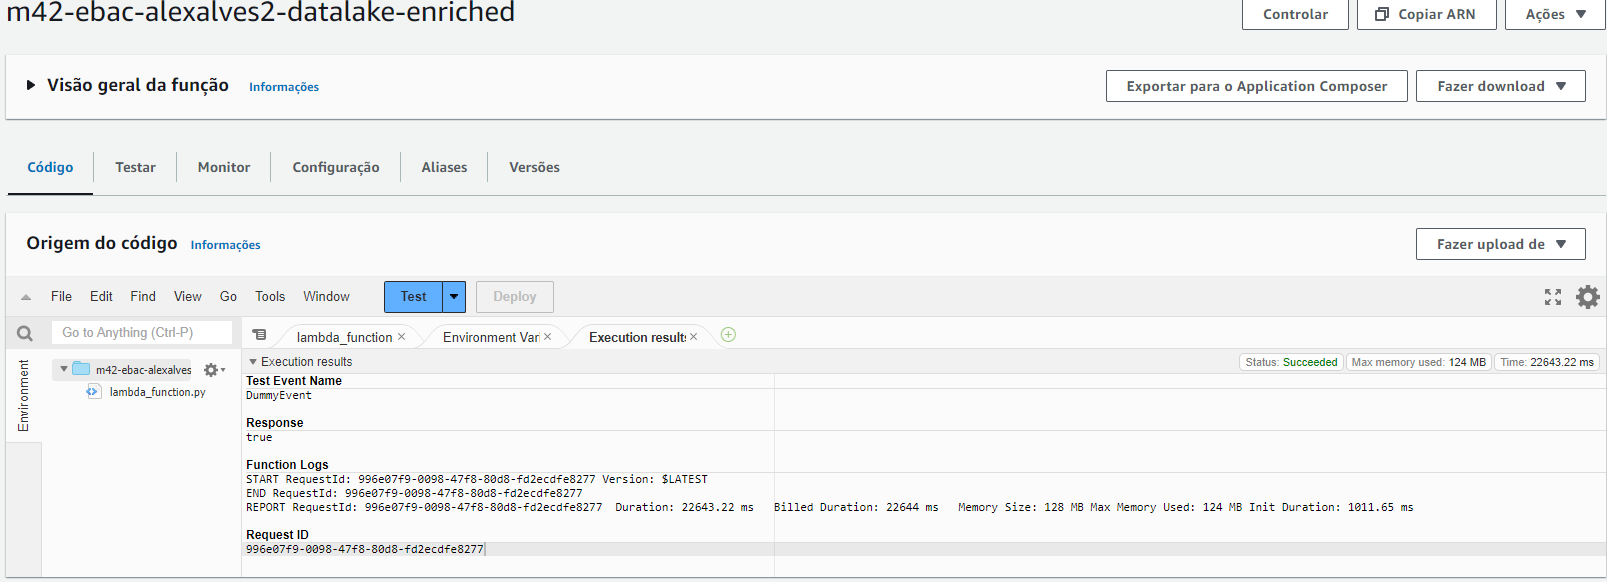

> **Nota**: Para testar a função, substitua o código `date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')` por `date = (datetime.now(tzinfo) - timedelta(days=0)).strftime('%Y-%m-%d')`, permitindo assim o processamento de mensagens de um mesmo dia.

2.3. Crie uma regra no `AWS Event Bridge` para executar a função do `AWS Lambda` todo dia a meia noite no horário de Brasília (GMT-3).

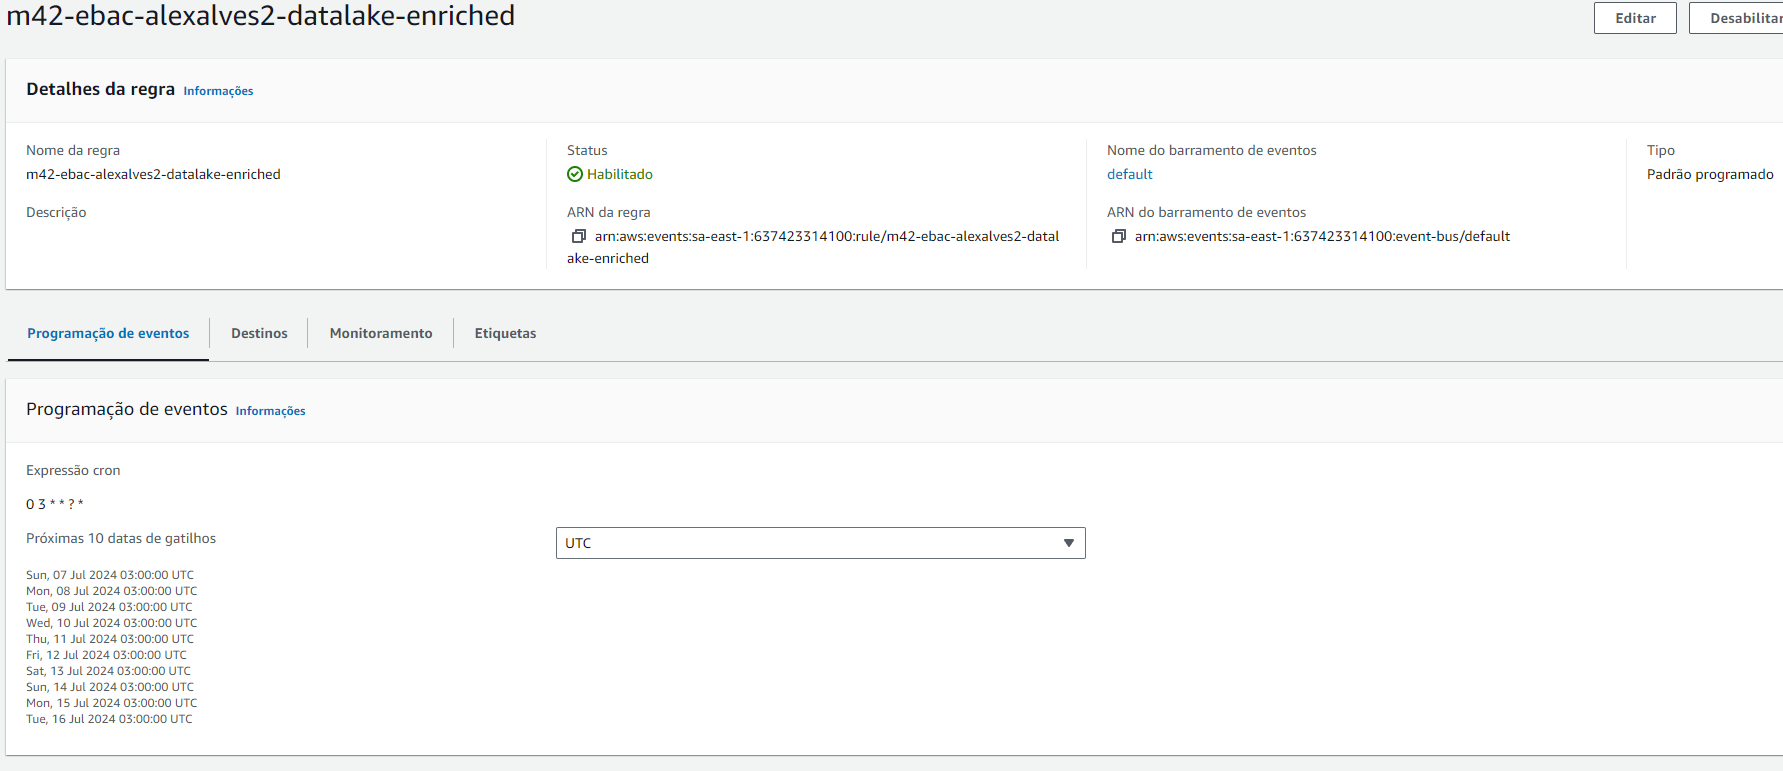

## 3\. Apresentação

Replique as atividades da aula 3.

3.1. Cria a tabela no `AWS Athena` que aponte para os dados armazenados no bucket enriquecido do `AWS S3`.

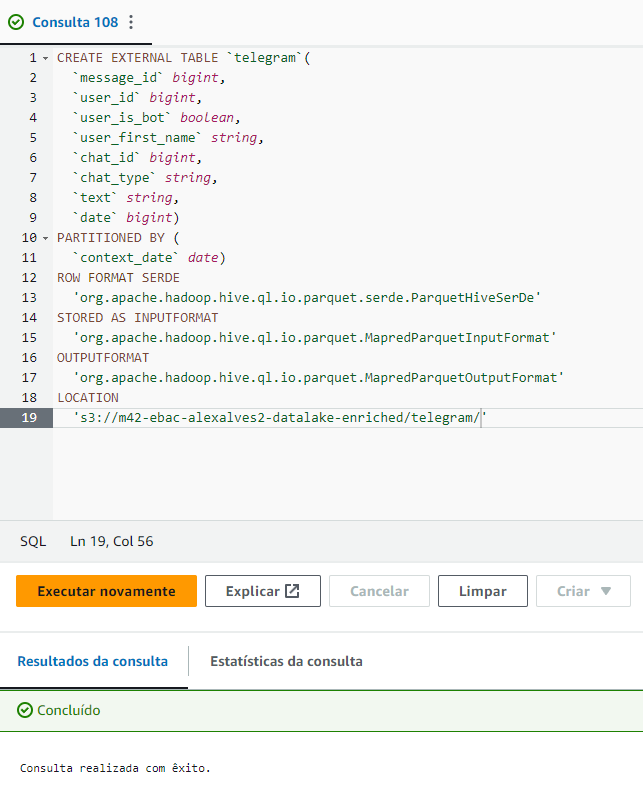

3.2. Execute o comando `MSCK REPAIR TABLE <nome-tabela>` para carregar as partições.

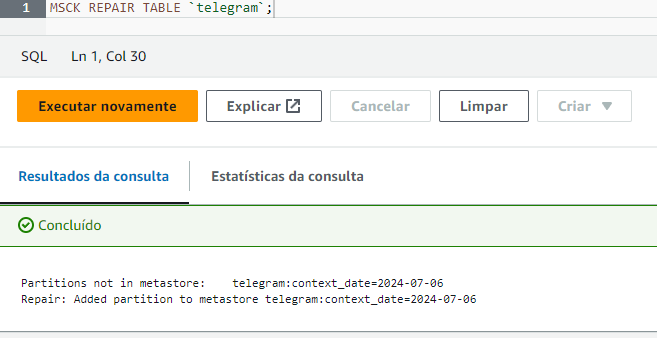

3.3. Execute as consultas SQL para explorar os dados.

* **Query 1**

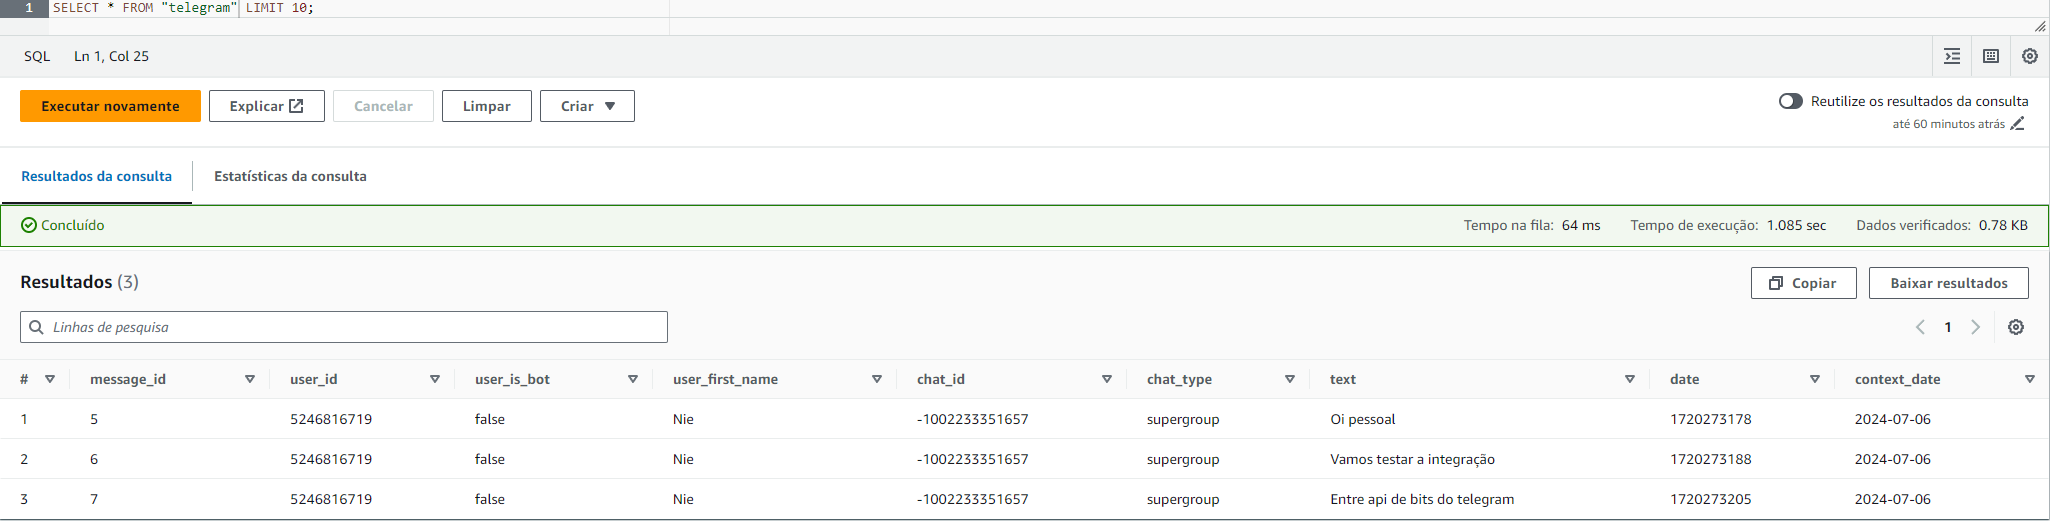

* **Query 2**

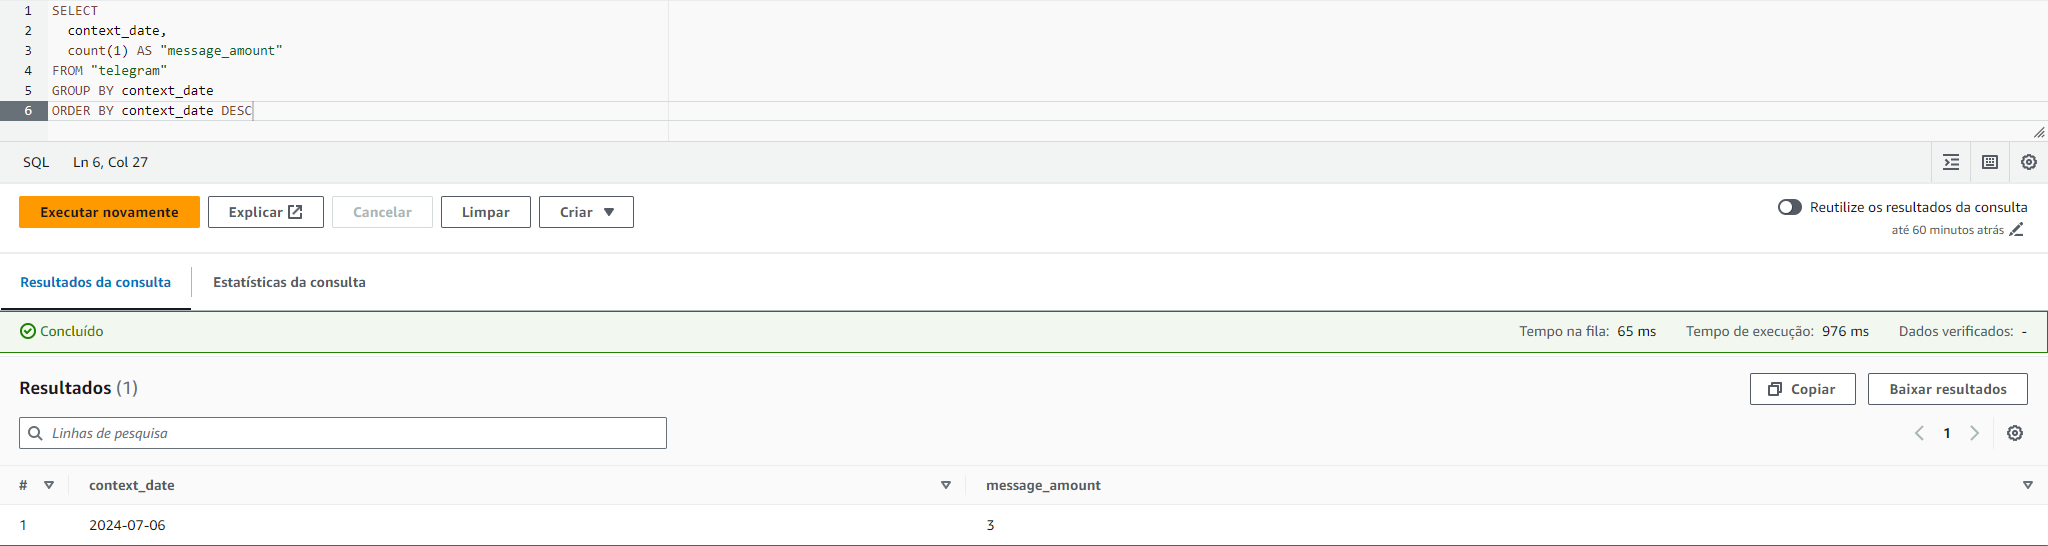

* **Query 3**

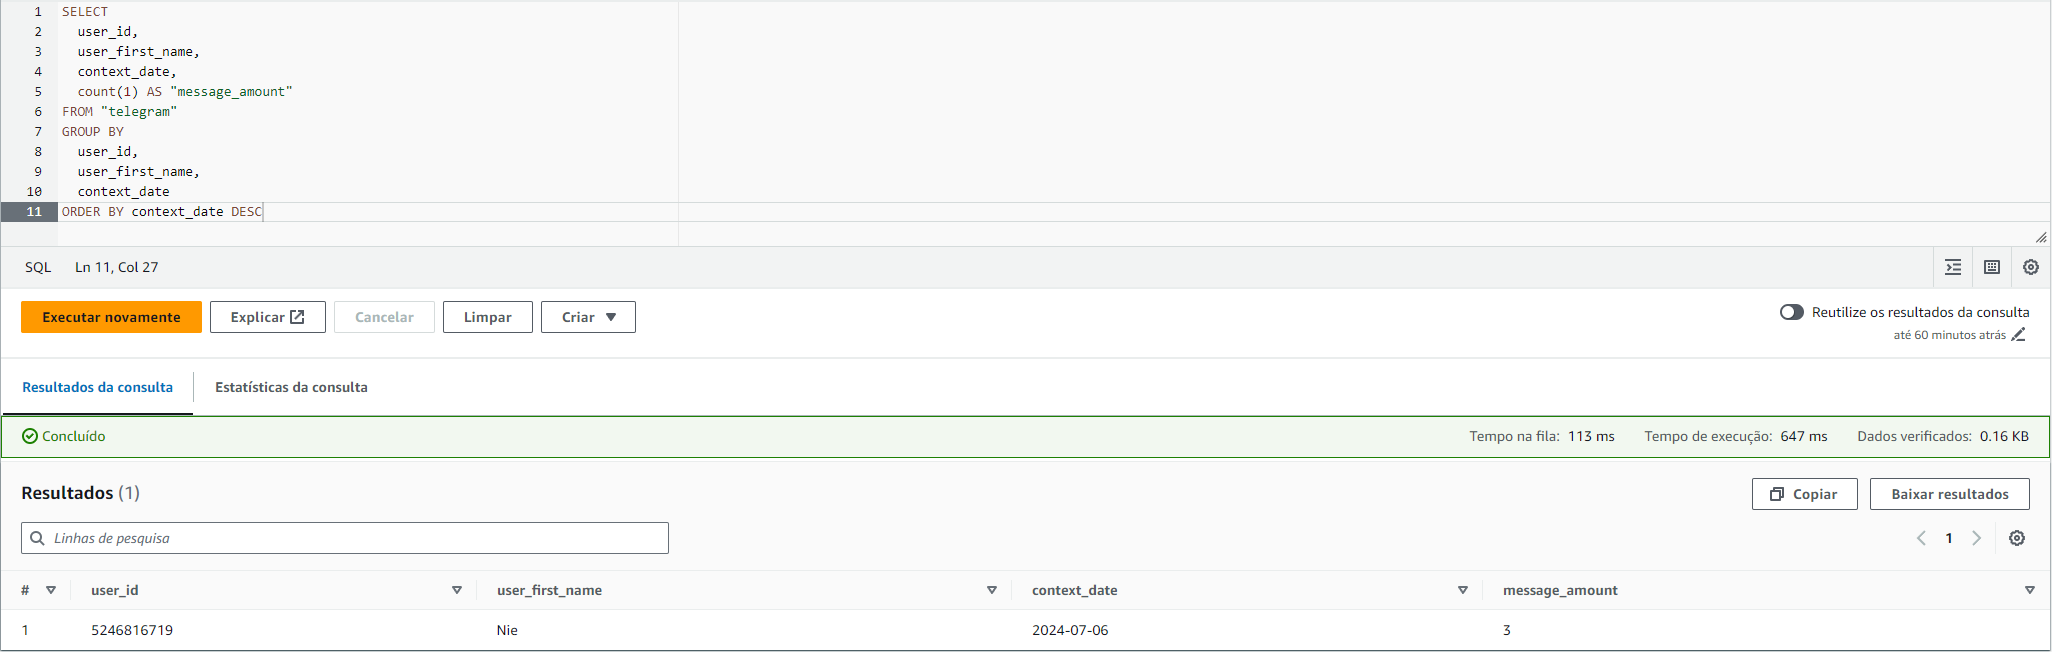

* **Query 4**

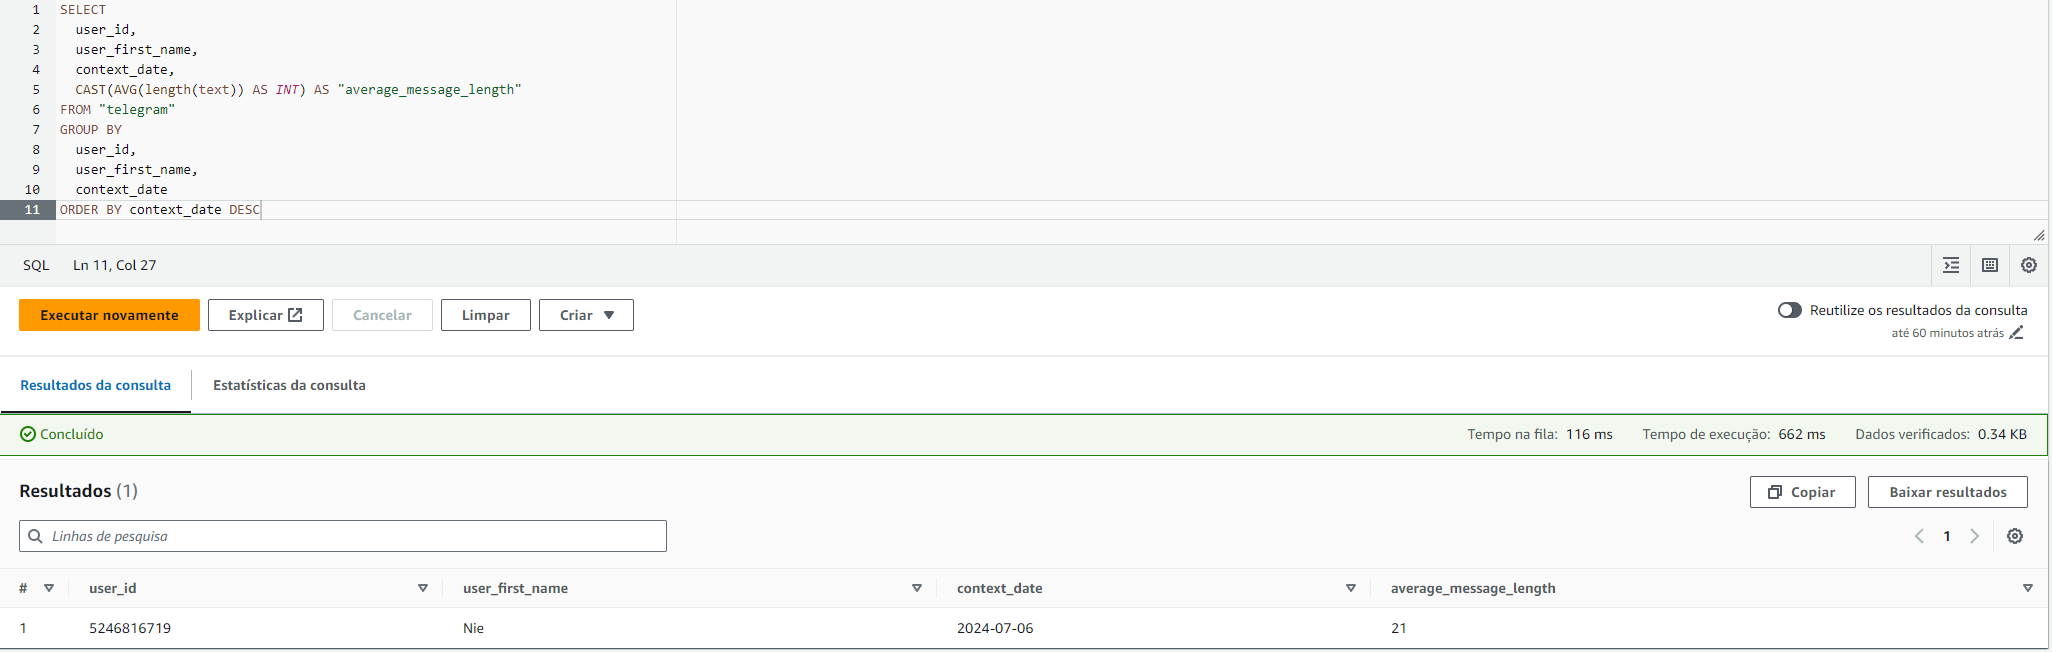

* **Query 5**

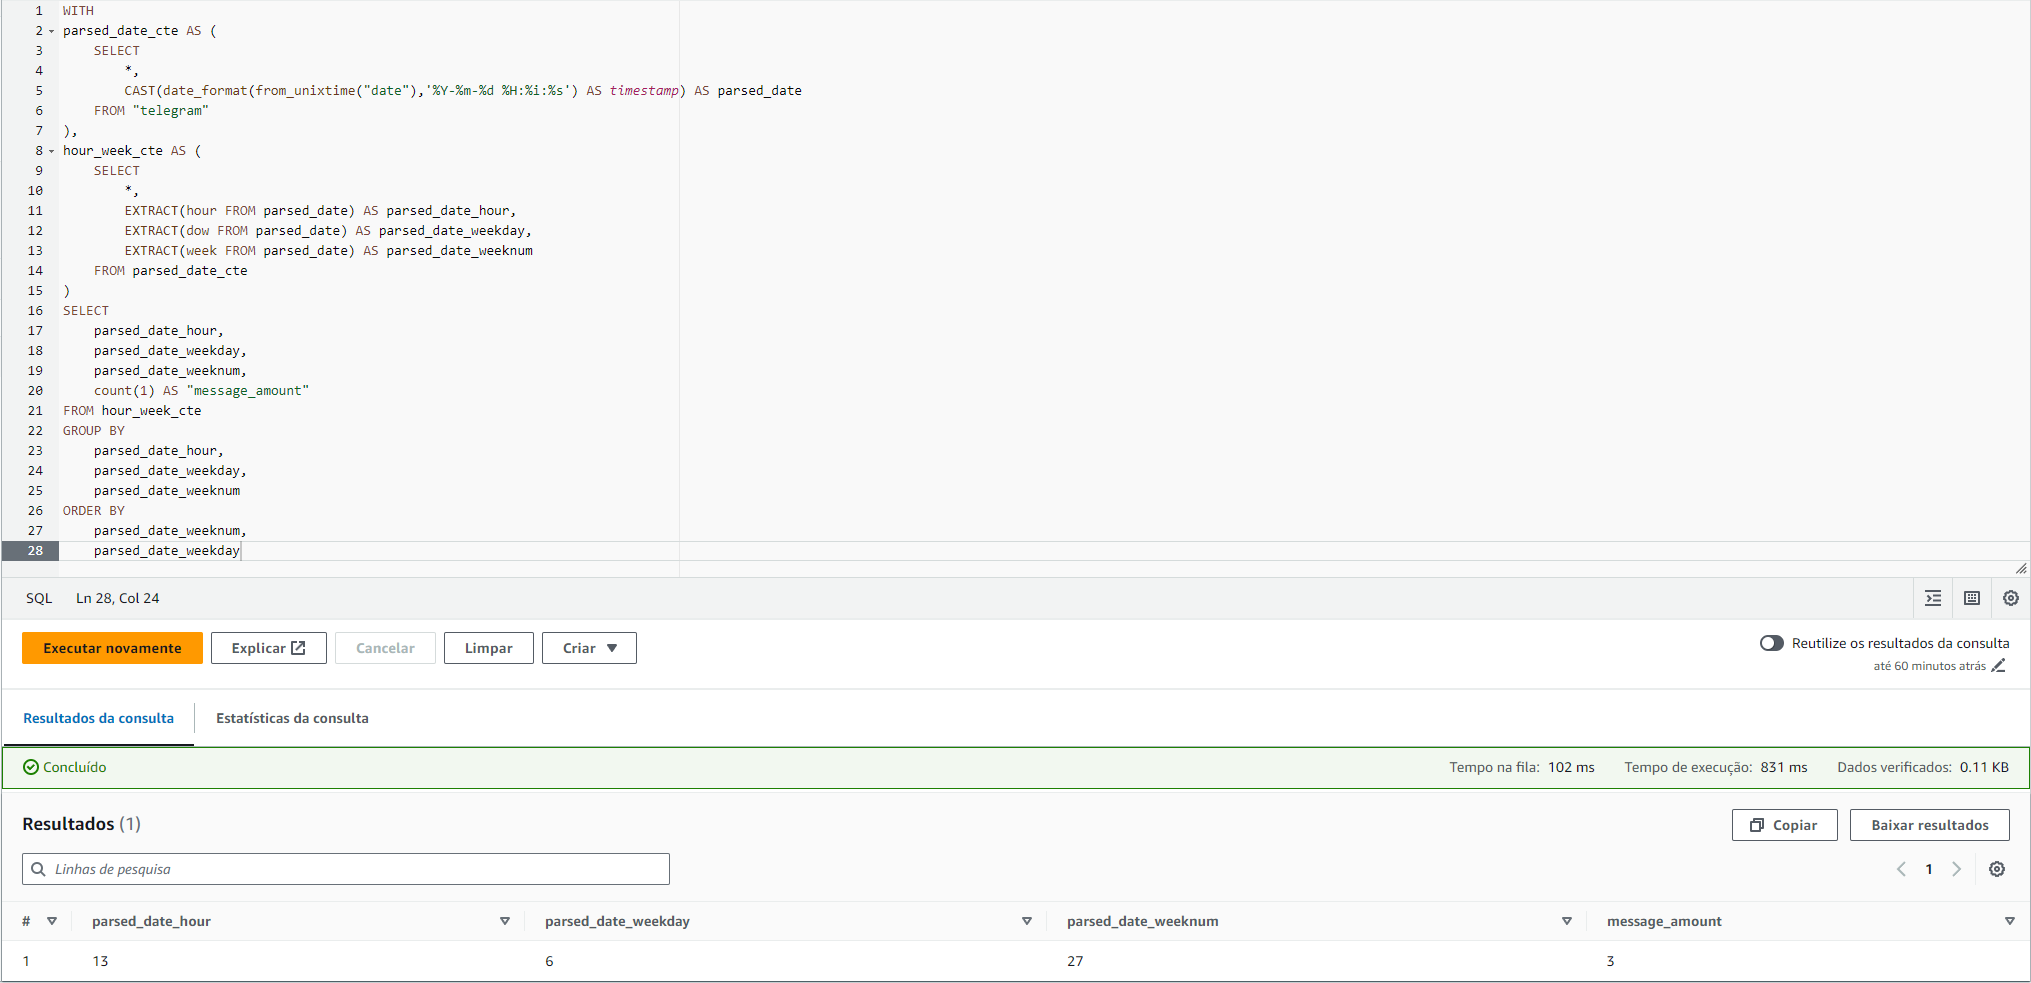

## 4\. Storytelling

Siga as dicas da aula 4 para expor o seu projeto.

* **GitHub:** https://github.com/AlexDevGuy/EBAC-Analista-de-Dados/blob/main/Projetos/Projeto%20Pipeline_aws_telegram/Projeto%20Pipeline_aws_telegram.ipynb